In [35]:
using CSV, DataFrames, Statistics, FreqTables, Pipe, Plots

In [2]:
ENV["LINES"], ENV["COLUMNS"] = 15, 200

(15, 200)

In [3]:
df = CSV.read("auto2.csv")

,mpg,cylinders,displacement,horesepower,weight,acceleration,year,origin,name,brand
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,String,String
1,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,chevrolet
2,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320,buick
3,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite,plymouth
4,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst,amc
5,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino,ford
6,15.0,8.0,429.0,198.0,4341.0,10.0,70.0,1.0,ford galaxie 500,ford
7,14.0,8.0,454.0,220.0,4354.0,9.0,70.0,1.0,chevrolet impala,chevrolet
8,14.0,8.0,440.0,215.0,4312.0,8.5,70.0,1.0,plymouth fury iii,plymouth
9,14.0,8.0,455.0,225.0,4425.0,10.0,70.0,1.0,pontiac catalina,pontiac


In [4]:
gdf = groupby(df, :brand)

,mpg,cylinders,displacement,horesepower,weight,acceleration,year,origin,name,brand
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,String,String
1,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,chevrolet
2,14.0,8.0,454.0,220.0,4354.0,9.0,70.0,1.0,chevrolet impala,chevrolet
3,15.0,8.0,400.0,150.0,3761.0,9.5,70.0,1.0,chevrolet monte carlo,chevrolet
4,28.0,4.0,140.0,90.0,2264.0,15.5,71.0,1.0,chevrolet vega 2300,chevrolet
5,17.0,6.0,250.0,100.0,3329.0,15.5,71.0,1.0,chevrolet chevelle malibu,chevrolet
6,14.0,8.0,350.0,165.0,4209.0,12.0,71.0,1.0,chevrolet impala,chevrolet
7,22.0,4.0,140.0,72.0,2408.0,19.0,71.0,1.0,chevrolet vega (sw),chevrolet
8,20.0,4.0,140.0,90.0,2408.0,19.5,72.0,1.0,chevrolet vega,chevrolet
9,13.0,8.0,350.0,165.0,4274.0,12.0,72.0,1.0,chevrolet impala,chevrolet


In [6]:
gdf[("ford",)]

,mpg,cylinders,displacement,horesepower,weight,acceleration,year,origin,name,brand
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,String,String
1,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino,ford
2,15.0,8.0,429.0,198.0,4341.0,10.0,70.0,1.0,ford galaxie 500,ford
3,21.0,6.0,200.0,85.0,2587.0,16.0,70.0,1.0,ford maverick,ford
4,10.0,8.0,360.0,215.0,4615.0,14.0,70.0,1.0,ford f250,ford
5,19.0,6.0,250.0,88.0,3302.0,15.5,71.0,1.0,ford torino 500,ford
6,14.0,8.0,351.0,153.0,4154.0,13.5,71.0,1.0,ford galaxie 500,ford
7,13.0,8.0,400.0,170.0,4746.0,12.0,71.0,1.0,ford country squire (sw),ford
8,18.0,6.0,250.0,88.0,3139.0,14.5,71.0,1.0,ford mustang,ford
9,21.0,4.0,122.0,86.0,2226.0,16.5,72.0,1.0,ford pinto runabout,ford


In [10]:
brand_mpg = combine(gdf, :mpg => mean => :mean_mpg)   # combine as in combine rows, aka, aggregate

,brand,mean_mpg
,String,Float64
1,chevrolet,20.4721
2,buick,19.1824
3,plymouth,21.7032
4,amc,18.0704
5,ford,19.475
6,pontiac,20.0125
7,dodge,22.0607
8,toyota,28.372
9,datsun,31.113


In [16]:
sort!(brand_mpg, :mean_mpg, rev=true)

,brand,mean_mpg
,String,Float64
1,vw,39.0167
2,nissan,36.0
3,triumph,35.0
4,honda,33.7615
5,datsun,31.113
6,mazda,30.86
7,subaru,30.525
8,vokswagen,29.8
9,renault,29.6667


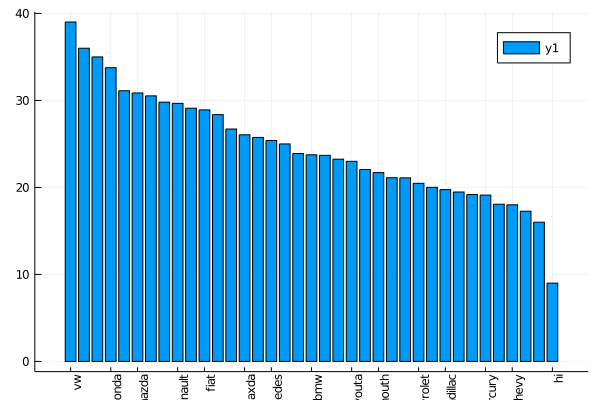

In [17]:
bar(brand_mpg.brand, brand_mpg.mean_mpg, xrotation=90)

In [20]:
freqtable(df, :brand, :origin)

37×3 Named Array{Int64,2}
brand ╲ origin │ 1.0  2.0  3.0
───────────────┼──────────────
amc            │  27    0    0
audi           │   0    7    0
bmw            │   0    2    0
buick          │  17    0    0
cadillac       │   2    0    0
⋮                  ⋮    ⋮    ⋮
triumph        │   0    1    0
vokswagen      │   0    1    0
volkswagen     │   0   15    0
volvo          │   0    6    0
vw             │   0    6    0

**The _ means take the output of the previous calc and use it here**

In [23]:
@pipe df |>
    groupby(_, :brand) |>
    combine(_, :origin => x->length(unique(x)))

,brand,origin_function
,String,Int64
1,chevrolet,1
2,buick,1
3,plymouth,1
4,amc,1
5,ford,1
6,pontiac,1
7,dodge,1
8,toyota,1
9,datsun,1


In [27]:
@pipe df |>
    groupby(_, [:origin, :brand]) |>
    combine(_, nrow)    # shortcut special case for nrow

,origin,brand,nrow
,Float64,String,Int64
1,1.0,chevrolet,43
2,1.0,buick,17
3,1.0,plymouth,31
4,1.0,amc,27
5,1.0,ford,48
6,1.0,pontiac,16
7,1.0,dodge,28
8,3.0,toyota,25
9,3.0,datsun,23


In [34]:
@pipe df |>
    groupby(_, [:origin, :brand]) |>
    combine(_, nrow) |>
    unstack(_, :brand, :origin, :nrow) |>  # make long to wide
    coalesce.(_, 0)                        # note . for broadcasting across the df

,brand,1.0,2.0,3.0
,String,Int64,Int64,Int64
1,amc,27,0,0
2,audi,0,7,0
3,bmw,0,2,0
4,buick,17,0,0
5,cadillac,2,0,0
6,capri,1,0,0
7,chevroelt,1,0,0
8,chevrolet,43,0,0
9,chevy,3,0,0
